In [178]:
import warnings
warnings.filterwarnings('ignore')

In [179]:
pip install pyecharts

In [180]:
pip install chart_studio

In [181]:
import pyecharts

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import operator
import seaborn as sns
from datetime import datetime
from matplotlib import font_manager, rc

from pyecharts.charts import Bar
from pyecharts.charts import Line

In [183]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [184]:
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
!ls -l '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv'

-rw------- 1 root root 75337 Nov 15 08:31 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv'
-rw------- 1 root root 17367 Nov 15 09:47 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv'
-rw------- 1 root root 24702 Nov 16 07:18 '/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv'


In [185]:
DF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/ab-practice.csv')
# DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin_Cash.csv')
DF_price = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/stock_market/Bitcoin.csv')

In [186]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       2662 non-null   object 
 1   coin_name  2662 non-null   object 
 2   num        2662 non-null   int64  
 3   s          2662 non-null   float64
 4   lang       2662 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 104.1+ KB


In [187]:
DF.groupby('coin_name')['coin_name'].count()

coin_name
ada     253
bch     227
btc     298
doge    164
eos      41
eth     346
omg     526
snt     742
xrp      65
Name: coin_name, dtype: int64

In [188]:
# DF_bch = DF[DF['coin_name'] == 'bch']
DF_bch = DF[DF['coin_name'] == 'btc']

In [189]:
DF_bch

,date,coin_name,num,s,lang
892,2021-01-01,btc,2,1.000000,kor
895,2021-01-02,btc,14,0.428571,kor
898,2021-01-03,btc,14,0.500000,kor
902,2021-01-04,btc,5,1.400000,kor
906,2021-01-05,btc,5,1.000000,kor
...,...,...,...,...,...
2624,2021-11-08,btc,3,2.000000,kor
2633,2021-11-09,btc,3,1.333333,kor
2640,2021-11-10,btc,2,1.000000,kor
2648,2021-11-11,btc,2,0.000000,kor


In [190]:
DF_bch = DF_bch.reset_index(drop=True)

In [191]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      316 non-null    object
 1   Price     316 non-null    object
 2   Open      316 non-null    object
 3   High      316 non-null    object
 4   Low       316 non-null    object
 5   Vol.      316 non-null    object
 6   Change %  316 non-null    object
dtypes: object(7)
memory usage: 17.4+ KB


In [192]:
DF_price.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Nov 12, 2021","64,134.5","64,782.6","65,449.7","62,309.7",63.27K,-1.04%
1,"Nov 11, 2021","64,806.7","64,922.8","65,583.3","64,121.9",50.37K,-0.19%
2,"Nov 10, 2021","64,932.6","66,942.6","68,990.6","62,951.3",96.21K,-2.95%
3,"Nov 09, 2021","66,904.4","67,528.7","68,493.3","66,334.9",66.13K,-0.92%
4,"Nov 08, 2021","67,527.9","63,276.4","67,763.3","63,276.4",81.08K,6.72%


In [193]:
DF_price['Price'][178]

'42,897.3'

In [194]:
DF_price['Price'][178] = DF_price['Price'][178].replace(',','')

In [195]:
DF_price['Price'][178]

'42897.3'

In [196]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = DF_price['Price'][i].replace(',','')



In [197]:
DF_price['Price'][178]

'42897.3'

In [198]:
DF_price['Price'][178] = pd.to_numeric(DF_price['Price'][178], downcast = 'float')

In [199]:
type(DF_price['Price'][179])

str

In [200]:
for i in range(len(DF_price['Price'])):
  DF_price['Price'][i] = pd.to_numeric(DF_price['Price'][i], downcast = 'float')

In [201]:
DF_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      316 non-null    object
 1   Price     316 non-null    object
 2   Open      316 non-null    object
 3   High      316 non-null    object
 4   Low       316 non-null    object
 5   Vol.      316 non-null    object
 6   Change %  316 non-null    object
dtypes: object(7)
memory usage: 17.4+ KB


In [202]:
date_time_obj = datetime.strptime(DF_price['Date'][0], '%b %d, %Y')
date_time_obj

datetime.datetime(2021, 11, 12, 0, 0)

In [203]:
date_time_obj.strftime("%Y-%m-%d")

'2021-11-12'

In [204]:
DF_price.iloc[0]

Date        Nov 12, 2021
Price            64134.5
Open            64,782.6
High            65,449.7
Low             62,309.7
Vol.              63.27K
Change %          -1.04%
Name: 0, dtype: object

In [228]:
A = []
for i in range(246):
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  A.append(a)

In [229]:
B = []
for i in range(246):
  x = DF_price['Price'][i]
  date_time_obj = datetime.strptime(DF_price['Date'][i], '%b %d, %Y')
  a = date_time_obj.strftime("%Y-%m-%d")
  Y = [a,x]
  B.append(Y)
DF_B = pd.DataFrame(B)
DF_B.columns = ['date','price']

In [207]:
# for i in DF_B['date']:
#   for j in DF_bch['date']:
#     if i == j:
#       print('매치', i, j)


In [230]:
C = []
for i in range(len(DF_B)):
  for j in range(len(DF_bch)):
    if DF_B['date'][i] == DF_bch['date'][j]:
      # print('매치', i, j , DF_B['date'][i], DF_bch['date'][j], DF_B['price'][i], DF_bch['s'][j])
      a = DF_B['date'][i]
      b = DF_B['price'][i]
      c = DF_bch['s'][j]
      d = DF_bch['num'][j]
      Y = [a,b,c,d]
      C.append(Y)
      
DF_bch_F = pd.DataFrame(C)
DF_bch_F.columns = ['date','price','s','num']

In [231]:
DF_bch_F

,date,price,s,num
0,2021-11-12,64134.500000,0.000000,2
1,2021-11-11,64806.699219,0.000000,2
2,2021-11-10,64932.601562,1.000000,2
3,2021-11-09,66904.398438,1.333333,3
4,2021-11-08,67527.898438,2.000000,3
...,...,...,...,...
223,2021-03-16,56889.699219,1.200000,15
224,2021-03-15,55791.300781,0.750000,8
225,2021-03-14,59113.699219,1.750000,4
226,2021-03-13,61195.300781,1.000000,6


In [210]:
# DF_bch_F.sort_values(by = 'date', axis = 0,ascending=True)
# # DF_bch_F = DF_bch_F.reset_index(drop=True)

In [211]:
# DF_bch_F = DF_bch_F.reset_index( inplace=True)

In [212]:
y_values = DF_bch_F['s']

In [213]:
z_values = DF_bch_F['price']

In [214]:
x_values = DF_bch_F['date']	

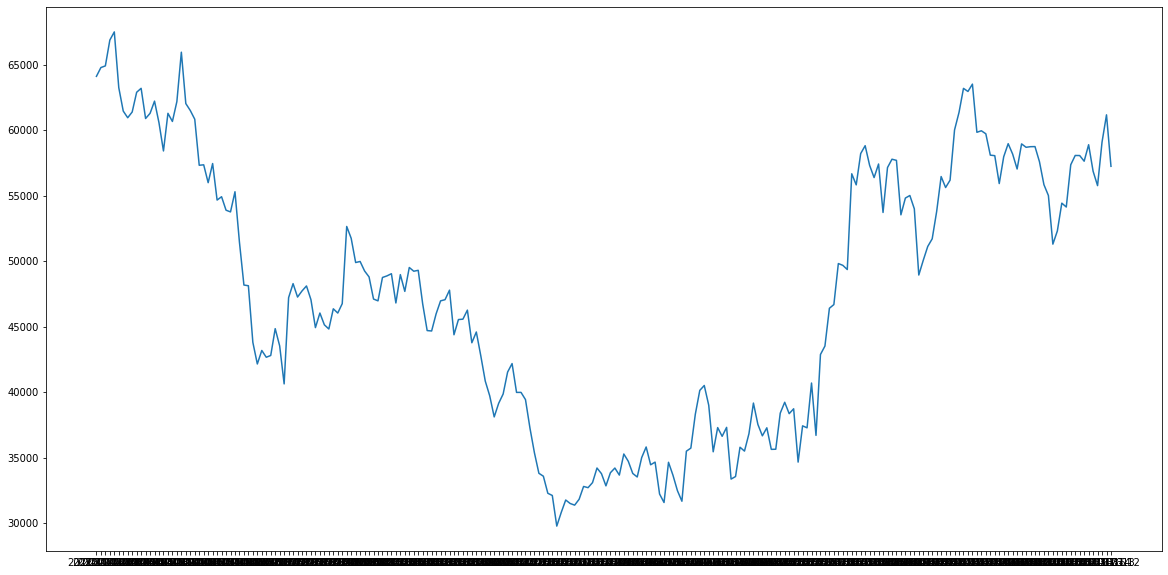

In [215]:
ax = plt.plot(x_values,z_values)
plt.show()

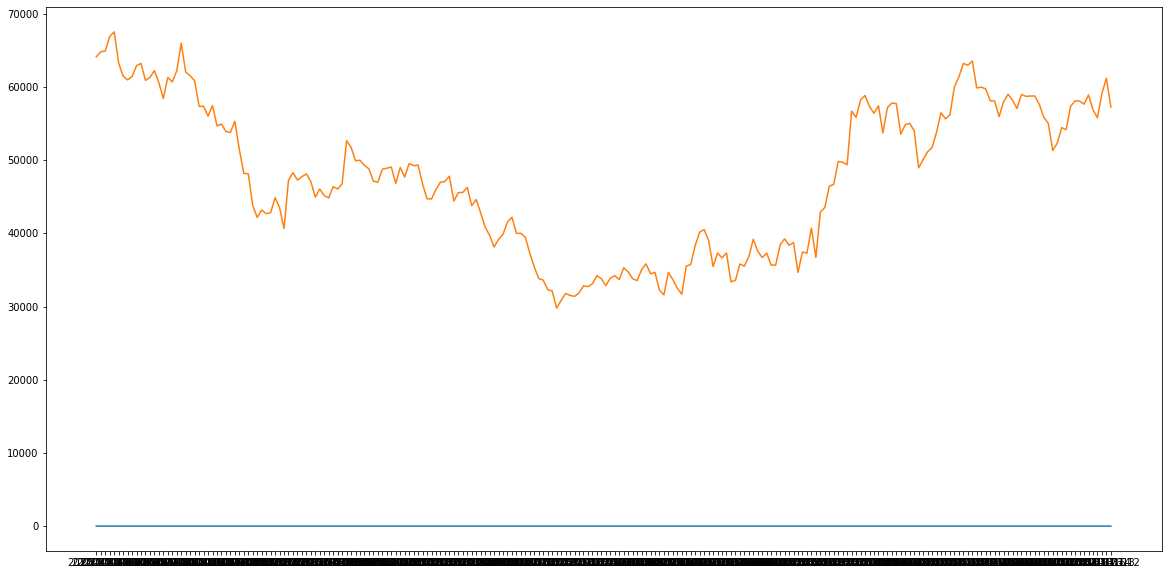

In [216]:
plt.figure(figsize=(20,10))

x_values = DF_bch_F['date']	
y_values = DF_bch_F['s']
z_values = DF_bch_F['price']
plt.plot(x_values, y_values)	
plt.plot(x_values, z_values)

plt.show()

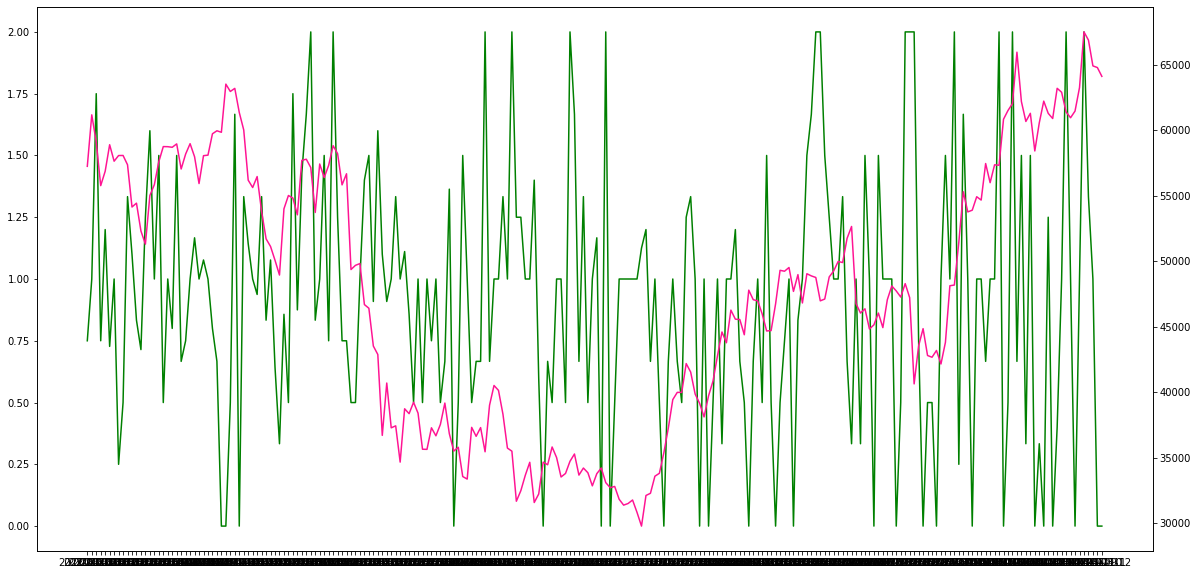

In [217]:
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax1 = plt.subplots()
ax1.plot(x_values, y_values , color = 'green')

ax2 = ax1.twinx()
ax2.invert_xaxis()
ax2.plot(x_values, z_values , color = 'deeppink')

plt.show()

In [232]:
import plotly.offline as plyo
import cufflinks

In [233]:
DF_bch_F1 = DF_bch_F.set_index("date")

In [234]:
DF_bch_F1

,price,s,num
date,,,
2021-11-12,64134.500000,0.000000,2
2021-11-11,64806.699219,0.000000,2
2021-11-10,64932.601562,1.000000,2
2021-11-09,66904.398438,1.333333,3
2021-11-08,67527.898438,2.000000,3
...,...,...,...
2021-03-16,56889.699219,1.200000,15
2021-03-15,55791.300781,0.750000,8
2021-03-14,59113.699219,1.750000,4


In [235]:
DF_bch_F1 ['s'] = -1*(DF_bch_F1['s']-1)*(DF_bch_F1['num'])*10000

In [236]:
plyo.iplot(DF_bch_F1.iplot(asFigure=True))

In [237]:
DF_bch_x = DF_bch_F1

In [238]:
for i in range(len(DF_bch_F1)):
  if DF_bch_F1['num'][i] <= 10 :
    DF_bch_x['s'][i] = 0
    # print('yes')
  # else :
  #   # print('no')


In [239]:
plyo.iplot(DF_bch_x.iplot(asFigure=True))

In [226]:
# x_values = DF_bch_Fx2['date']	
# y_values = DF_bch_Fx2['s']
# z_values = DF_bch_Fx2['price']

# plt.rcParams['figure.figsize'] = (20, 10)
# fig, ax1 = plt.subplots()
# ax1.plot(x_values, y_values , color = 'green')

# ax2 = ax1.twinx()
# ax2.invert_xaxis()
# ax2.plot(x_values, z_values , color = 'deeppink')

# plt.show()